In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [55]:
watch_data =pd.read_csv("flipkart_watches_data2k.csv")

In [56]:
watch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     2840 non-null   object 
 1   Price    2840 non-null   object 
 2   Brand    2719 non-null   object 
 3   Ratings  2840 non-null   float64
 4   Reviews  2840 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 111.1+ KB


In [57]:
watch_data.head()

,Name,Price,Brand,Ratings,Reviews
0,Analog Watch - For Boys New Attractive Design...,₹209,Shivark,2.0,71
1,Trending Day & Date Functioning for Boys Analo...,₹279,LOIS CARON,4.5,93
2,T800 Digital Watch - For Boys & Girls 1221,₹386,RLS,2.6,235
3,Seraphina Analog Watch - For Women FCN089UL,"₹1,359",French Connection,1.3,394
4,Stylish Analog Watch - For Women 81727784,₹900,Dressberry,4.4,169


In [58]:
watch_data.shape

(2840, 5)

In [59]:
watch_data.duplicated().sum()

0

In [60]:
watch_data.isnull().sum().sum()

121

In [61]:
# Example: Extract whether it's Analog/Digital
watch_data["Type"] = watch_data["Name"].str.extract(r"(Analog|Digital|Smart)", expand=False)


In [62]:
watch_data.head()

,Name,Price,Brand,Ratings,Reviews,Type
0,Analog Watch - For Boys New Attractive Design...,₹209,Shivark,2.0,71,Analog
1,Trending Day & Date Functioning for Boys Analo...,₹279,LOIS CARON,4.5,93,Analog
2,T800 Digital Watch - For Boys & Girls 1221,₹386,RLS,2.6,235,Digital
3,Seraphina Analog Watch - For Women FCN089UL,"₹1,359",French Connection,1.3,394,Analog
4,Stylish Analog Watch - For Women 81727784,₹900,Dressberry,4.4,169,Analog


In [63]:


watch_data["Gender_All"] = watch_data["Name"].str.findall(r"(Boys|Girls|Men|Women)")

# Convert to a single Gender column
def get_gender(gender_list):
    if not gender_list:
        return np.nan
    if len(set(gender_list)) > 1:   
        return "Universal"
    return gender_list[0]           

watch_data["Gender"] = watch_data["Gender_All"].apply(get_gender)



In [64]:
watch_data.head()

,Name,Price,Brand,Ratings,Reviews,Type,Gender_All,Gender
0,Analog Watch - For Boys New Attractive Design...,₹209,Shivark,2.0,71,Analog,[Boys],Boys
1,Trending Day & Date Functioning for Boys Analo...,₹279,LOIS CARON,4.5,93,Analog,[Boys],Boys
2,T800 Digital Watch - For Boys & Girls 1221,₹386,RLS,2.6,235,Digital,"[Boys, Girls]",Universal
3,Seraphina Analog Watch - For Women FCN089UL,"₹1,359",French Connection,1.3,394,Analog,[Women],Women
4,Stylish Analog Watch - For Women 81727784,₹900,Dressberry,4.4,169,Analog,[Women],Women


In [65]:
# Drop helper column if not needed
watch_data = watch_data.drop(columns=["Gender_All"])


In [66]:
watch_data.head()


,Name,Price,Brand,Ratings,Reviews,Type,Gender
0,Analog Watch - For Boys New Attractive Design...,₹209,Shivark,2.0,71,Analog,Boys
1,Trending Day & Date Functioning for Boys Analo...,₹279,LOIS CARON,4.5,93,Analog,Boys
2,T800 Digital Watch - For Boys & Girls 1221,₹386,RLS,2.6,235,Digital,Universal
3,Seraphina Analog Watch - For Women FCN089UL,"₹1,359",French Connection,1.3,394,Analog,Women
4,Stylish Analog Watch - For Women 81727784,₹900,Dressberry,4.4,169,Analog,Women


In [67]:
watch_data.isnull().sum()

Name         0
Price        0
Brand      121
Ratings      0
Reviews      0
Type       509
Gender     722
dtype: int64

In [15]:
#watch_data=pd.read_csv("watches_data2k_cleaned.csv")

In [68]:
watch_data.shape

(2840, 7)

In [17]:
watch_data.isnull().sum()

Name         0
Price        0
Brand      121
Ratings      0
Reviews      0
Type       509
Gender     722
dtype: int64

In [18]:
print("Null Count in Brand Column:",watch_data['Brand'].isnull().sum())


Null Count in Brand Column: 121


In [19]:
watch_data['Brand'] = watch_data['Brand'].fillna("Unknown")
print("Null Count in Brand Column after updated:",watch_data['Brand'].isnull().sum())

Null Count in Brand Column after updated: 0


In [20]:
print("Null Count in Type Column:",watch_data['Type'].isnull().sum())

Null Count in Type Column: 509


In [21]:
watch_data['Type'] = watch_data['Type'].fillna("Unknown")
print("Null Count in Type Column after updated:",watch_data['Type'].isnull().sum())

Null Count in Type Column after updated: 0


In [22]:
print("Null Count in Gender Column:",watch_data['Gender'].isnull().sum())

Null Count in Gender Column: 722


In [23]:
watch_data['Gender'] = watch_data['Gender'].fillna("Unknown")
print("Null Count in Gender Column after updated:",watch_data['Gender'].isnull().sum())

Null Count in Gender Column after updated: 0


In [24]:
watch_data.rename(columns ={'Price' : 'Price(₹)'}, inplace=True)

In [25]:
watch_data["Price(₹)"] = watch_data["Price(₹)"].str.replace("₹","")

In [26]:
watch_data["Price(₹)"] = (watch_data["Price(₹)"].str.replace("₹","").str.replace(",","").astype(int))


In [27]:
watch_data.isnull().sum()

Name        0
Price(₹)    0
Brand       0
Ratings     0
Reviews     0
Type        0
Gender      0
dtype: int64

In [29]:
watch_data.to_csv("watches_cleaned.csv", index=False, encoding="utf-8-sig")

In [30]:
watch_data.isnull().sum()

Name        0
Price(₹)    0
Brand       0
Ratings     0
Reviews     0
Type        0
Gender      0
dtype: int64

## EDA 

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
w_data=pd.read_csv("watches_cleaned.csv")

In [33]:
## UNIVARIATE ANALYSIS

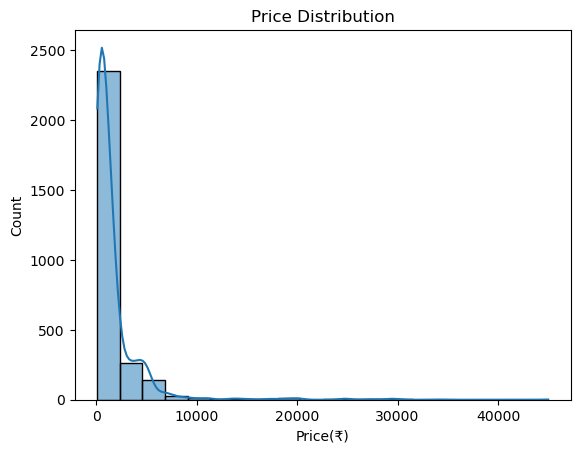

In [34]:
# Price Distribution
sns.histplot(w_data['Price(₹)'], bins=20, kde=True)
plt.title("Price Distribution")
plt.show()


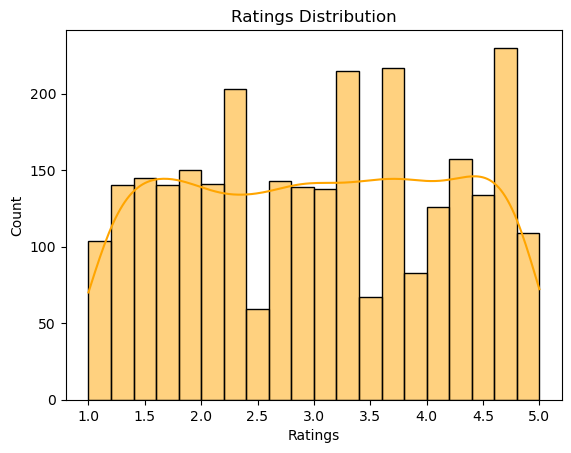

In [35]:
# Ratings Distribution
sns.histplot(w_data['Ratings'], bins=20, kde=True, color="orange")
plt.title("Ratings Distribution")
plt.show()

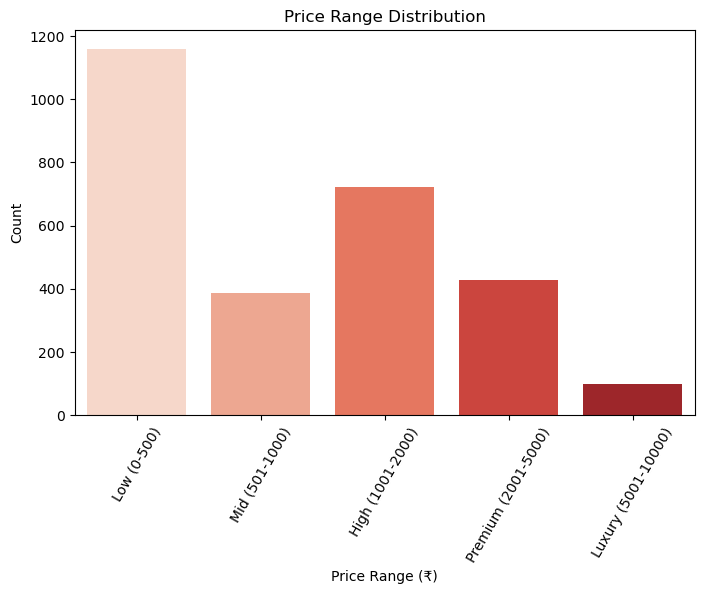

Price_Range
Low (0-500)            1160
High (1001-2000)        722
Premium (2001-5000)     427
Mid (501-1000)          386
Luxury (5001-10000)      98
Name: count, dtype: int64


In [69]:

bins = [0, 500, 1000, 2000, 5000, 10000]
labels = ['Low (0-500)', 'Mid (501-1000)', 'High (1001-2000)', 'Premium (2001-5000)', 'Luxury (5001-10000)']

w_data['Price_Range'] = pd.cut(w_data['Price(₹)'], bins=bins, labels=labels)
# Plot countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Price_Range', data=w_data, palette='Reds')

plt.title("Price Range Distribution")
plt.xlabel("Price Range (₹)")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()


# Check distribution
print(w_data['Price_Range'].value_counts())


In [70]:
w_data.to_csv("watches_cleaned.csv", index=False, encoding="utf-8-sig")


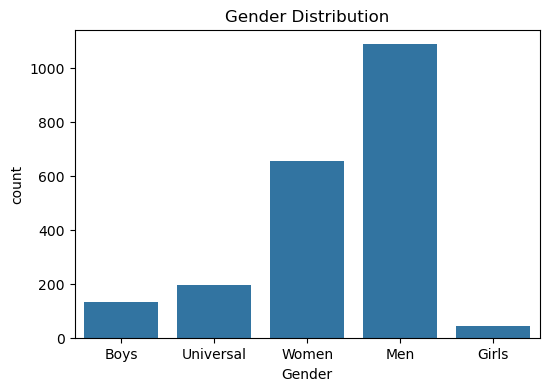

In [49]:

filtered_data = w_data[w_data["Gender"] != "Unknown"]

# Gender count plot
plt.figure(figsize=(6,4))
sns.countplot(data=filtered_data, x='Gender')
plt.title("Gender Distribution")
plt.show()


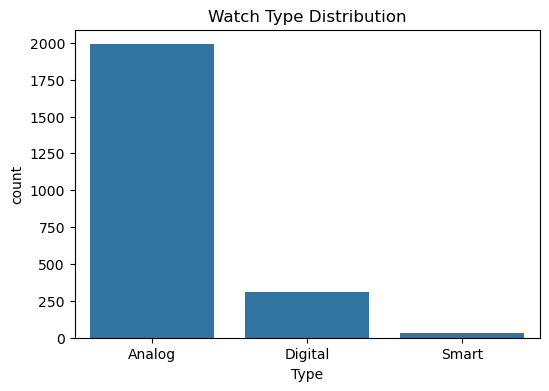

In [50]:
# Watch Type count
filtered_data = w_data[w_data["Type"] != "Unknown"]
plt.figure(figsize=(6,4))
sns.countplot(data=filtered_data, x='Type')
plt.title("Watch Type Distribution")
plt.show()


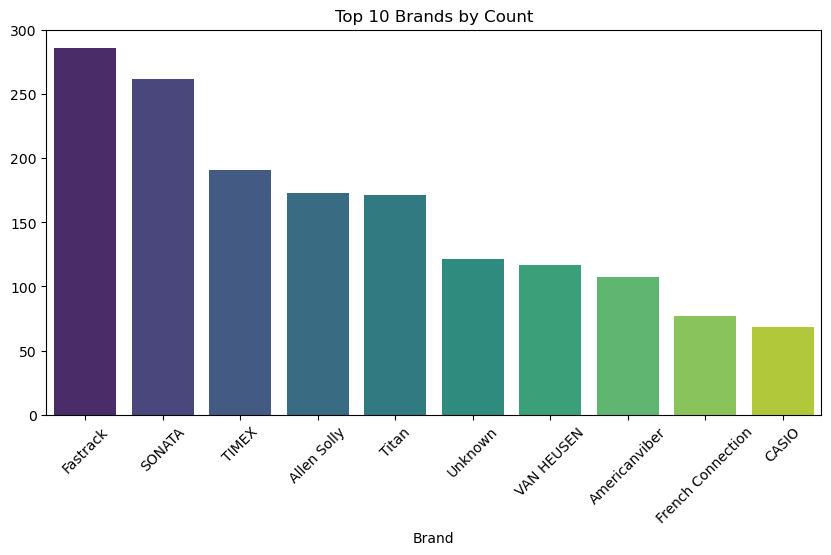

In [39]:
# Brand count (Top 10)
plt.figure(figsize=(10,5))
top_brands = w_data['Brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Count")
plt.show()

In [40]:
##  2. BIVARIATE ANALYSIS

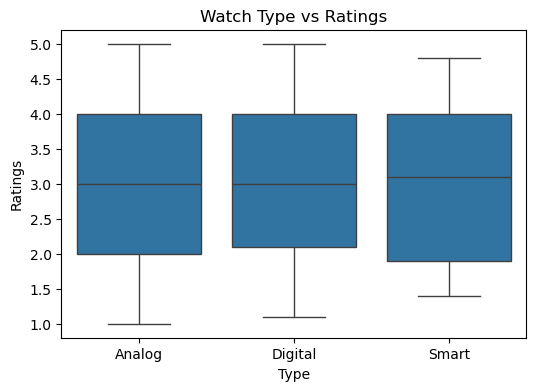

In [52]:
# Watch Type vs Ratings
filtered_data = w_data[w_data["Type"] != "Unknown"]
plt.figure(figsize=(6,4))
sns.boxplot(data=filtered_data, x='Type', y='Ratings')
plt.title("Watch Type vs Ratings")
plt.show()

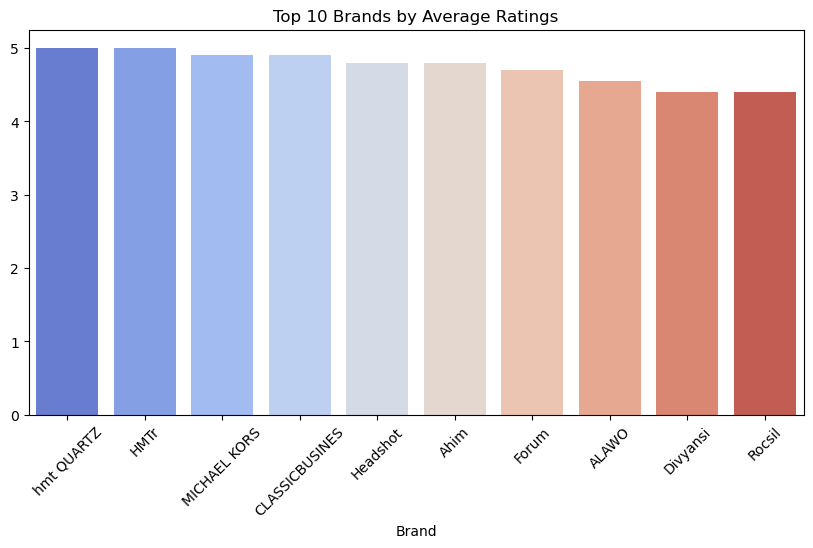

In [42]:
#Brand vs Average Rating (Top 10)
plt.figure(figsize=(10,5))
top10_brands = w_data.groupby('Brand')['Ratings'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top10_brands.index, y=top10_brands.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Average Ratings")
plt.show()

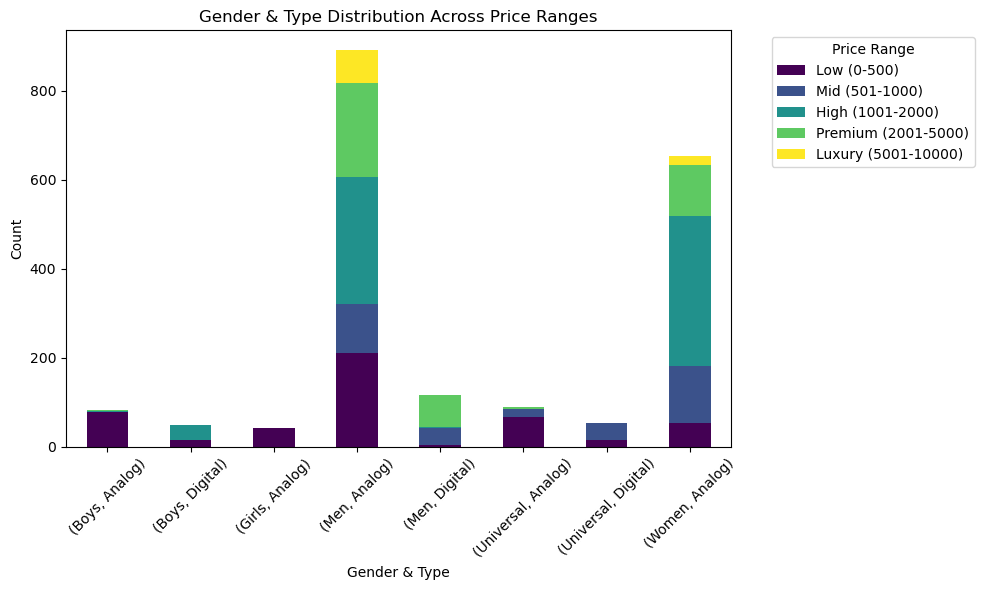

In [43]:
# Filter out 'Unknown' gender
#df_filtered = w_data[w_data['Gender'] != 'Unknown']
df_filtered = w_data[(w_data['Gender'] != 'Unknown') & (w_data['Type'] != 'Unknown')]

# Stacked Bar - Gender vs Type vs Price Range
cross_tab = pd.crosstab([df_filtered['Gender'], df_filtered['Type']], df_filtered['Price_Range'])
cross_tab.plot(kind="bar", stacked=True, figsize=(10,6), colormap='viridis')

plt.title("Gender & Type Distribution Across Price Ranges")
plt.ylabel("Count")
plt.xlabel("Gender & Type")
plt.xticks(rotation=45)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


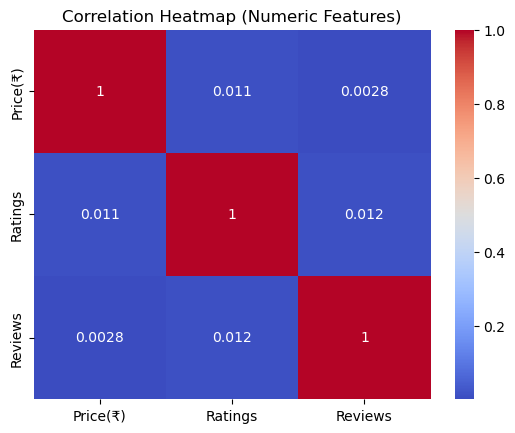

In [44]:
# Correlation Heatmap
sns.heatmap(w_data[['Price(₹)','Ratings','Reviews']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [53]:
watch_data.to_csv("watches_cleaned.csv", index=False, encoding="utf-8-sig")
